# **1. EXPLORASI AWAL**

In [6]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score

In [7]:
# Membaca dataset
data = pd.read_csv('Titanic-Dataset.csv')

# Lihat 5 data teratas
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**a. Berapa jumlah total penumpang dalam data?**


In [8]:
total_penumpang = data.shape[0]
print(f"Total jumlah penumpang: {total_penumpang}")

Total jumlah penumpang: 891


Jawab:

Jumlah penumpang dalam data adalah 891 orang.

**b. Berapa jumlah penumpang yang selamat dan tidak selamat? Tampilkan dalam bentuk tabel dan grafik.**

          Status  Jumlah
0  Tidak Selamat     549
1        Selamat     342


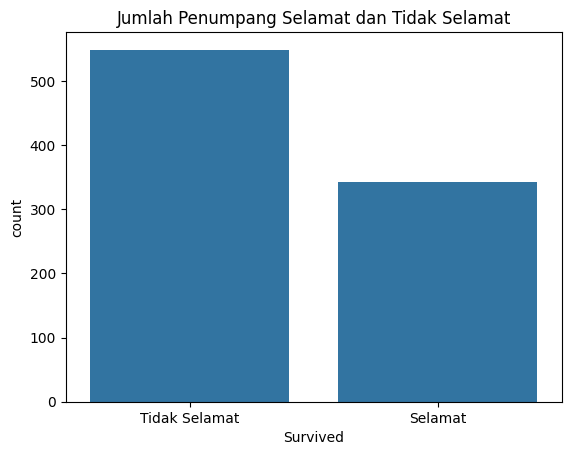

In [9]:
# Hitung jumlah penumpang berdasarkan 'Survived'
survival_counts = data['Survived'].value_counts()

# Membuat DataFrame baru supaya hasilnya berbentuk tabel
survival_table = pd.DataFrame({
    'Status': ['Tidak Selamat', 'Selamat'],
    'Jumlah': [survival_counts[0], survival_counts[1]]
})

# Tampilkan tabel
print(survival_table)

# Grafik
sns.countplot(x='Survived', data=data)
plt.title('Jumlah Penumpang Selamat dan Tidak Selamat')
plt.xticks([0, 1], ['Tidak Selamat', 'Selamat'])  # Ubah label 0 jadi "Tidak Selamat", 1 jadi "Selamat"
plt.show()

Jawab:

Jumlah penumpang yang selamat: 342 orang

Jumlah penumpang yang tidak selamat: 549 orang


**c. Berapa rata-rata umur penumpang? dan siapa penumpang termuda dan tertua?**

In [10]:
# Rata-rata, termuda, tertua (angka)
rata_rata_umur = data['Age'].mean()
penumpang_termuda = data['Age'].min()
penumpang_tertua = data['Age'].max()

print(f"Rata-rata umur: {rata_rata_umur:.2f} tahun")
print(f"Umur penumpang termuda: {penumpang_termuda} tahun")
print(f"Umur penumpang tertua: {penumpang_tertua} tahun")

# Menampilkan data penumpang termuda
print("\n=== Data Penumpang Termuda ===")
print(data[data['Age'] == penumpang_termuda])

# Menampilkan data penumpang tertua
print("\n=== Data Penumpang Tertua ===")
print(data[data['Age'] == penumpang_tertua])

Rata-rata umur: 29.70 tahun
Umur penumpang termuda: 0.42 tahun
Umur penumpang tertua: 80.0 tahun

=== Data Penumpang Termuda ===
     PassengerId  Survived  Pclass                             Name   Sex  \
803          804         1       3  Thomas, Master. Assad Alexander  male   

      Age  SibSp  Parch Ticket    Fare Cabin Embarked  
803  0.42      0      1   2625  8.5167   NaN        C  

=== Data Penumpang Tertua ===
     PassengerId  Survived  Pclass                                  Name  \
630          631         1       1  Barkworth, Mr. Algernon Henry Wilson   

      Sex   Age  SibSp  Parch Ticket  Fare Cabin Embarked  
630  male  80.0      0      0  27042  30.0   A23        S  


Jawab:

Rata-rata umur penumpang adalah 29,7 tahun.

Penumpang termuda adalah Thomas Master Assad Alexander dengan umur 0,24 tahun.

Penumpang tertua adalah Barkworth Mr. Algernon Henry Wilson dengan umur 80 tahun.

**d. Berapa jumlah penumpang berdasarkan jenis kelamin? Siapa yang lebih banyak? Visualisasikan.**

Sex
male      577
female    314
Name: count, dtype: int64


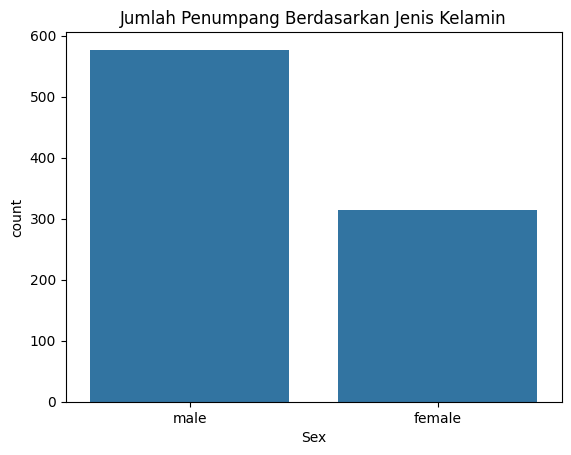

In [11]:
gender_counts = data['Sex'].value_counts()
print(gender_counts)

# Visualisasi
sns.countplot(x='Sex', data=data)
plt.title('Jumlah Penumpang Berdasarkan Jenis Kelamin')
plt.show()

Jawab:

Jumlah penumpang berdasarkan jenis kelamin



1.  Laki-laki: 577 orang
2.   Perempuan: 314 orang

Jadi, lebih banyak penumpang berjenis kelamin laki-laki.



**e. Tampilkan jumlah penumpang berdasarkan kelas (PClass) dan berapa persen dari total data yang berada dikelas 1? Visualisasikan.**

Pclass
3    491
1    216
2    184
Name: count, dtype: int64
Pclass
3    55.106622
1    24.242424
2    20.650954
Name: count, dtype: float64


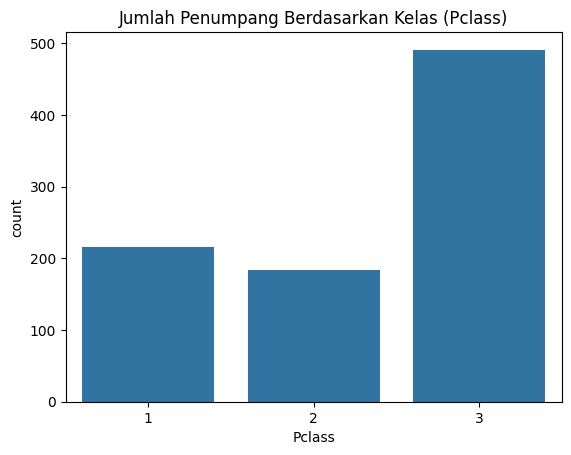

In [12]:
pclass_counts = data['Pclass'].value_counts()
print(pclass_counts)

# Hitung persentase
pclass_percentage = pclass_counts / total_penumpang * 100
print(pclass_percentage)

# Visualisasi
sns.countplot(x='Pclass', data=data)
plt.title('Jumlah Penumpang Berdasarkan Kelas (Pclass)')
plt.show()

Jawab:

Jumlah penumpang berdasarkan Kelas (Pclass) terdiri dari Pclass 1, 2, dan 3. Pclass 1 terdiri 216 orang, pclass 2 terdiri dari 184 orang dan pclass 3 terdiri dari 491.

Persentase pclass 1 dari total data penumpang adalah 24.242424%

# **2. PREPROCESSING**

**a. Apakah terdapat missing value pada data tersebut?**

In [13]:
data.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [14]:
data.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [15]:
#mengetahui jumlah missing value di seluruh dataset
data.isnull().sum().sum()


np.int64(866)

Jawab:

Ya, terdapat missing value pada data tersebut yaitu pada kolom Age, Cabin dan Embarked.

**b. Jika ya, apa yang anda lakukan?**

**Kolom Age**

In [16]:
#melihat isi dalam kolom harga
data['Age'].unique()

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [17]:
#jumlah missing value
np.sum(data['Age'].isnull())

np.int64(177)

In [18]:
#mengisi missing value
data['Age']=data['Age'].fillna(data['Age'].median())

In [19]:
#jumlah missing value
np.sum(data['Age'].isnull())

np.int64(0)

**Kolom Cabin**

In [20]:
#melihat isi dalam kolom harga
data['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [21]:
#jumlah missing value
np.sum(data['Cabin'].isnull())

np.int64(687)

In [22]:
#mengisi missing value dengan modus (nilai yang paling sering muncul)
data['Cabin'] = data['Cabin'].fillna(data['Cabin'].mode()[0])

In [23]:
#jumlah missing value
np.sum(data['Cabin'].isnull())

np.int64(0)

**Kolom Embarked**

In [24]:
#melihat isi dalam kolom harga
data['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [25]:
#jumlah missing value
np.sum(data['Embarked'].isnull())

np.int64(2)

In [26]:
#mengisi missing value dengan modus (nilai yang paling sering muncul)
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])

In [27]:
#jumlah missing value
np.sum(data['Embarked'].isnull())

np.int64(0)

Jawab:

Melakukan penanganan missing value:


1.   Mengisi missing value pada kolom Age dengan median
2.   Mengisi missing value pada kolom Cabin dengan modus
3. Mengisi missing value pada kolom Embarked dengan modus



**c. Apakah ada outlier pada data tersebut? Jelaskan apa itu outlier.**

**BoxPlot**

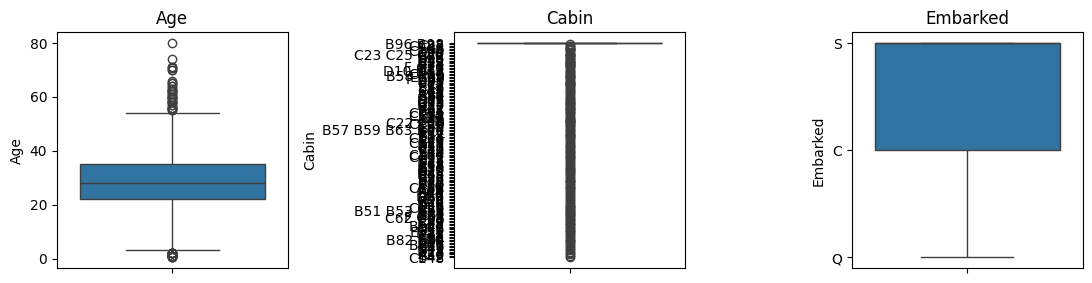

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Kolom numerik yang ingin dicek outliernya
num_cols = ['Age','Cabin','Embarked']

# Visualisasi Boxplot
plt.figure(figsize=(15, 8))
for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(y=data[col])
    plt.title(col)
plt.tight_layout()
plt.show()

**IQR**

In [29]:
import pandas as pd

# Misal 'data' adalah dataframe kamu

# Untuk Cabin: ambil panjang string (jumlah karakter) saja sebagai numeric
data['Cabin_num'] = data['Cabin'].astype(str).apply(len)

# Untuk Embarked: mapping manual
embarked_mapping = {'C': 0, 'Q': 1, 'S': 2}
data['Embarked_num'] = data['Embarked'].map(embarked_mapping)

# Sekarang kolom 'Cabin_num' dan 'Embarked_num' bisa dihitung IQR
cols_to_check = ['Age', 'Cabin_num', 'Embarked_num']

# Fungsi deteksi outlier IQR
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

# Loop untuk cek semua kolom
for col in cols_to_check:
    outliers = detect_outliers_iqr(data, col)
    print(f"\nJumlah outlier di kolom '{col}': {len(outliers)}")
    if not outliers.empty:
        display(outliers)



Jumlah outlier di kolom 'Age': 66


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_num,Embarked_num
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.00,3,1,349909,21.0750,B96 B98,S,7,2
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.00,0,0,113783,26.5500,C103,S,4,2
15,16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.00,0,0,248706,16.0000,B96 B98,S,7,2
16,17,0,3,"Rice, Master. Eugene",male,2.00,4,1,382652,29.1250,B96 B98,Q,7,1
33,34,0,2,"Wheadon, Mr. Edward H",male,66.00,0,0,C.A. 24579,10.5000,B96 B98,S,7,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
827,828,1,2,"Mallet, Master. Andre",male,1.00,0,2,S.C./PARIS 2079,37.0042,B96 B98,C,7,0
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.00,0,0,113572,80.0000,B28,S,3,2
831,832,1,2,"Richards, Master. George Sibley",male,0.83,1,1,29106,18.7500,B96 B98,S,7,2
851,852,0,3,"Svensson, Mr. Johan",male,74.00,0,0,347060,7.7750,B96 B98,S,7,2



Jumlah outlier di kolom 'Cabin_num': 192


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_num,Embarked_num
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,3,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,4,2
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,3,2
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,2,2
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S,3,2
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S,11,2
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C,3,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,3,2



Jumlah outlier di kolom 'Embarked_num': 0


Jawab:

Ya, terdapat outlier pada data tersebut diantaranya pada kolom Age sebanyak 66 outlier, kolom Cabin_num sebanyak 192 outlier dan kolom embared_num sebanyak 0 outlier.

Outlier adalah data atau nilai yang secara mencolok berbeda dari nilai-nilai lain dalam suatu dataset. Outlier ini muncul sebagai data yang menyimpang dari pola umum, bisa berupa nilai yang jauh lebih tinggi atau lebih rendah dibandingkan dengan data lainnya. Keberadaan outlier bisa disebabkan oleh berbagai faktor, seperti kesalahan dalam pengukuran, kejadian yang jarang terjadi, atau variasi alami dalam data itu sendiri. Deteksi terhadap outlier sangat penting karena dapat berdampak besar pada hasil analisis dan model prediksi, serta membantu menemukan data yang mungkin keliru atau peristiwa penting yang perlu diperhatikan. Beberapa metode yang sering digunakan untuk mendeteksi outlier antara lain adalah teknik statistik seperti Z-Score, Interquartile Range (IQR), visualisasi menggunakan box plot, serta pendekatan berdasarkan jarak atau kepadatan data.

**d. Apakah Outlier pada data tersebut perlu diatasi serta bagaimana cara mengatasinya?**

**Penanganan Outlier dengan Winsorizing (Mengganti Outlier dengan Batas IQR)**

In [30]:
import pandas as pd
from scipy.stats.mstats import winsorize

# Step 1: Preprocessing Cabin dan Embarked
# Membuat numeric Cabin dan Embarked
data['Cabin_num'] = data['Cabin'].astype(str).apply(len)

embarked_mapping = {'C': 0, 'Q': 1, 'S': 2}
data['Embarked_num'] = data['Embarked'].map(embarked_mapping)

# Step 2: Winsorizing function berbasis IQR
def winsorize_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Ganti nilai yang di bawah lower_bound menjadi lower_bound
    data[column] = data[column].apply(lambda x: lower_bound if x < lower_bound else x)
    # Ganti nilai yang di atas upper_bound menjadi upper_bound
    data[column] = data[column].apply(lambda x: upper_bound if x > upper_bound else x)

    return data

# Step 3: Terapkan Winsorizing ke kolom yang diinginkan
cols_to_winsorize = ['Age', 'Cabin_num', 'Embarked_num']

for col in cols_to_winsorize:
    data = winsorize_iqr(data, col)

print("Sukses melakukan Winsorizing pada kolom:", cols_to_winsorize)


Sukses melakukan Winsorizing pada kolom: ['Age', 'Cabin_num', 'Embarked_num']


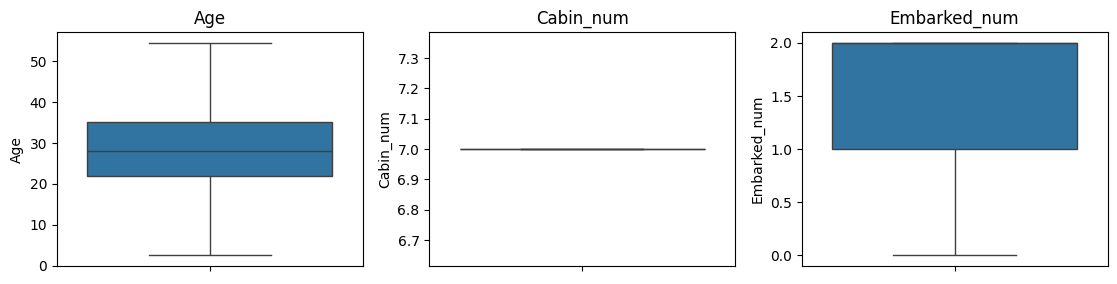

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Kolom numerik yang ingin dicek outliernya
num_cols = ['Age', 'Cabin_num', 'Embarked_num']

# Visualisasi Boxplot
plt.figure(figsize=(15, 8))
for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(y=data[col])
    plt.title(col)
plt.tight_layout()
plt.show()

Jawab:

Ya, Perlu diatasi. Outlier pada data ini diatasi dengan menggunakan Winsorizing (Mengganti Outlier dengan Batas IQR). Kode tersebut menerapkan Winsorizing berbasis IQR untuk mengatasi outlier pada kolom Age, Cabin_num, dan Embarked_num di dataset Titanic. Sebelumnya, kolom Cabin dikonversi menjadi Cabin_num berdasarkan jumlah karakter, sedangkan Embarked diubah menjadi Embarked_num melalui pemetaan ke angka. Winsorizing dilakukan dengan mengganti nilai yang berada di bawah batas bawah (Q1 - 1,5 × IQR) menjadi nilai batas bawah, dan nilai yang melebihi batas atas (Q3 + 1,5 × IQR) menjadi nilai batas atas. Dengan cara ini, distribusi data menjadi lebih stabil tanpa perlu menghapus data ekstrem, sehingga ukuran dataset tetap terjaga dan dampak outlier terhadap analisis dapat diminimalkan.


**e. Jika dibutuhkan silahkan lakukan transformasi/standarisasi/scalling terhadap data tersebut.**

**Scalling**

In [32]:
from sklearn.preprocessing import StandardScaler

# Pilih kolom yang mau distandarisasi
features_to_scale = ['Age', 'Cabin_num', 'Embarked_num']

scaler = StandardScaler()
data[features_to_scale] = scaler.fit_transform(data[features_to_scale])

print("Sukses scaling kolom:", features_to_scale)


Sukses scaling kolom: ['Age', 'Cabin_num', 'Embarked_num']


Jawab:

Ya, butuh dilakukan scalling. Pada dataset Titanic, scaling menjadi penting karena fitur numerik seperti Age, Cabin_num, dan Embarked_num memiliki rentang nilai yang tidak seragam. Tanpa scaling, fitur dengan nilai lebih besar bisa mendistorsi proses pembelajaran model. StandardScaler digunakan untuk menstandarisasi data sehingga setiap fitur memiliki nilai rata-rata nol dan standar deviasi satu, memastikan semua fitur berperan adil. Teknik ini sangat krusial untuk model berbasis jarak seperti Logistic Regression, KNN, dan SVM guna meningkatkan kinerja dan stabilitas.

## **3. MODELLING**

**a. Jelaskan proses pembagian data menjadi data training dan testing dan alasan mengapa perlu membagi data tersebut.**

Jawab:

Pembagian data training dan testing adalah proses memisahkan dataset menjadi dua bagian utama. Data training digunakan untuk membangun atau melatih model agar dapat mengenali pola dalam data, sedangkan data testing dimanfaatkan untuk menguji kinerja model menggunakan data yang belum pernah digunakan selama proses pelatihan, sehingga hasil evaluasinya lebih objektif.

Alasan:

Pemisahan data menjadi data latih dan data uji bertujuan untuk mencegah overfitting serta mengevaluasi kemampuan model secara lebih objektif. Jika model dilatih dan diuji menggunakan data yang sama, ia cenderung hanya mengingat data tersebut tanpa benar-benar mempelajari polanya, sehingga kinerjanya bisa menurun ketika dihadapkan pada data baru. Dengan memisahkan data, kita dapat mengukur apakah model mampu mengenali pola secara umum dan melakukan prediksi yang akurat terhadap data yang belum dikenalnya.

In [33]:
# Drop kolom yang tidak relevan
df_clean = data.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'])

# Pisahkan fitur dan target
X = df_clean.drop(columns='Survived')
y = df_clean['Survived']

# Tentukan kolom numerik dan kategorikal
numerical_cols = ['Age', 'Fare', 'SibSp', 'Parch']
categorical_cols = ['Sex', 'Embarked', 'Pclass']

# Import necessary modules for pipeline
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# Buat pipeline preprocessing
numerical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

# Gabungkan pipeline
from sklearn.compose import ColumnTransformer # Import ColumnTransformer
preprocessor = ColumnTransformer([
    ('num', numerical_pipeline, numerical_cols),
    ('cat', categorical_pipeline, categorical_cols)
])

# Split data 80% train, 20% test
from sklearn.model_selection import train_test_split # Import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Terapkan preprocessing
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

**b. Berapa persen pembagiannya? Mengapa memilih pembagian dengan proporsi tersebut?**

Jawab:

Data dibagi 80% untuk training dan 20% untuk testing.

Alasan:

Agar model memiliki cukup banyak data untuk belajar pola, tetapi tetap tersedia data cukup banyak untuk mengevaluasi performa model pada data baru.

**c. Buatlah model klasifikasi dari 3 algoritma yang berbeda. Jelaskan masing-masing model dan cara kerjanya.**



In [34]:
# Import model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Buat 3 model
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC()
}

# Train semua model
for name, model in models.items():
    model.fit(X_train_processed, y_train)

Jawab:



1.   Logistic Regression.

  Logistic Regression merupakan teknik statistik yang digunakan untuk memperkirakan probabilitas terjadinya suatu peristiwa, dan umumnya diterapkan pada masalah klasifikasi biner, seperti menentukan apakah seseorang selamat atau tidak, atau apakah hasil tes positif atau negatif. Walaupun disebut "regression", metode ini sebenarnya difokuskan untuk memprediksi kategori, bukan nilai numerik yang berkelanjutan.  
  **Cara kerja:** Logistic Regression bekerja dengan membuat kombinasi linear dari fitur-fitur input, kemudian mengubah hasil tersebut menggunakan fungsi logistik (sigmoid) untuk menghasilkan nilai antara 0 dan 1 yang merepresentasikan probabilitas. Kombinasi linear ini dinyatakan dalam bentuk persamaan z, nilai z tersebut kemudian diproses melalui fungsi sigmoid, dan model menentukan kelas berdasarkan ambang batas tertentu, biasanya 0,5. Jika probabilitas lebih besar dari ambang batas, data diklasifikasikan ke dalam satu kelas; jika lebih kecil, ke kelas yang lain. Melalui mekanisme ini, Logistic Regression menjadi metode yang sangat efektif dalam menyelesaikan masalah klasifikasi biner.

2.   Random Forest Classifier

  Random Forest Classifier merupakan metode machine learning yang bekerja dengan membangun banyak decision tree secara acak. Setiap tree memberikan prediksi, dan hasil akhir diperoleh dengan menggabungkan semua prediksi tersebut.

  **Cara kerja:** Random Forest Classifier bekerja dengan membangun banyak decision tree secara terpisah, di mana setiap tree dilatih menggunakan sampel data dan fitur yang dipilih secara acak. Untuk memprediksi data baru, setiap tree memberikan hasil prediksi, dan Random Forest menggabungkan hasil prediksi ini, biasanya dengan metode voting, untuk mendapatkan prediksi akhir yang lebih akurat.

3. SVM
  
  Support Vector Machine (SVM) adalah algoritma pembelajaran mesin yang diawasi, digunakan untuk tugas klasifikasi dan regresi dengan cara menentukan hyperplane optimal yang memisahkan data ke dalam dua atau lebih kategori.
  
  **Cara kerja:** SVM bekerja dengan mencari hyperplane yang memperbesar margin, yaitu jarak terjauh antara hyperplane dan titik data terdekat dari setiap kelas yang disebut support vectors. Jika data tidak dapat dipisahkan secara linear, SVM menerapkan teknik kernel untuk memetakan data ke ruang berdimensi lebih tinggi sehingga pemisahan linear menjadi memungkinkan. Oleh karena itu, SVM sangat efektif dalam menangani data yang kompleks dan berdimensi tinggi.



**d. Berapa nilai evaluasi dari masing-masing model pada data yang diuji? Apa arti dari masing-masing metrik evaluasi tersebut.**

In [35]:
# Import metrics
from sklearn.metrics import classification_report

# Evaluasi semua model
for name, model in models.items():
    y_pred = model.predict(X_test_processed)
    print(f"Model: {name}")
    print(classification_report(y_test, y_pred))
    print("-" * 50)

Model: Logistic Regression
              precision    recall  f1-score   support

           0       0.81      0.86      0.83       105
           1       0.78      0.72      0.75        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179

--------------------------------------------------
Model: Random Forest
              precision    recall  f1-score   support

           0       0.84      0.85      0.84       105
           1       0.78      0.77      0.78        74

    accuracy                           0.82       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179

--------------------------------------------------
Model: SVM
              precision    recall  f1-score   support

           0       0.82      0.88      0.85       105
           1       0.81      0.73      0.77        74

    accuracy         

Jawab:

Berikut adalah nilai evaluasi dari masing-masing model pada data yang diuji, beserta arti dari masing-masing metrik evaluasi:

***Logistic Regression***
*   Precision:
    *   Kelas 0: 0.81 (Dari semua yang diprediksi sebagai kelas 0, 81% benar)
    *   Kelas 1: 0.78 (Dari semua yang diprediksi sebagai kelas 1, 78% benar)
*   Recall:
    *   Kelas 0: 0.86 (Dari semua data kelas 0 yang sebenarnya, 86% berhasil diprediksi)
    *   Kelas 1: 0.72 (Dari semua data kelas 1 yang sebenarnya, 72% berhasil diprediksi)
*   F1-Score:
    *   Kelas 0: 0.83
    *   Kelas 1: 0.75
*   Accuracy: 0.80 (Secara keseluruhan, 80% prediksi benar)

***Random Forest***
*   Precision:
    *   Kelas 0: 0.84
    *   Kelas 1: 0.78
*   Recall:
    *   Kelas 0: 0.85
    *   Kelas 1: 0.77
*   F1-Score:
    *   Kelas 0: 0.84
    *   Kelas 1: 0.78
*   Accuracy: 0.82

***SVM***
*   Precision:
    *   Kelas 0: 0.82
    *   Kelas 1: 0.81
*   Recall:
    *   Kelas 0: 0.88
    *   Kelas 1: 0.73
*   F1-Score:
    *   Kelas 0: 0.85
    *   Kelas 1: 0.77
*   Accuracy: 0.82

***Arti Metrik Evaluasi:***

**Precision**: Seberapa akurat model dalam memprediksi kelas positif. Presisi tinggi berarti model tidak banyak melakukan kesalahan dengan memprediksi sesuatu sebagai positif padahal sebenarnya negatif.

**Recall**: Seberapa baik model menemukan semua contoh positif. Recall tinggi berarti model berhasil menemukan sebagian besar contoh positif yang sebenarnya.

**F1-Scor**: Rata-rata harmonik antara precision dan recall. F1-score memberikan keseimbangan antara precision dan recall.

**Accuracy**: Seberapa sering model membuat prediksi yang benar secara keseluruhan. Akurasi adalah metrik yang baik jika kelas-kelas dalam dataset memiliki jumlah sampel yang kurang lebih sama.

**Support**: Jumlah sampel aktual untuk setiap kelas dalam data uji.



**e. Bandingkan hasil dari ketiga algoritma tersebut, mana yang paling bagus?Berikan ulasan kira-kira apa yang menyebabkan metode tersebut dapat memprediksi data set anda dengan baik.**

Jawab:

Berdasarkan hasil evaluasi diperoleh bahwa:

* Accuracy: Random Forest dan SVM memiliki akurasi yang
sama yaitu 0.82, sedikit lebih tinggi dari Logistic Regression yang memiliki akurasi 0.80.

* F1-Score: Random Forest memiliki F1-Score yang sedikit lebih baik untuk kelas 1 (0.78) dibandingkan dengan SVM (0.77), sementara Logistic Regression memiliki F1-Score yang lebih rendah (0.75).

Secara keseluruhan, Random Forest dan SVM menunjukkan performa yang lebih baik dibandingkan dengan Logistic Regression pada data yang diuji.

**Penyebab Random Forest dan SVM dapat memprediksi dataset dengan baik:**

* Dataset yang Kompleks: Dataset mungkin memiliki hubungan non-linear atau interaksi antar fitur yang kompleks, yang lebih baik ditangani oleh Random Forest dan SVM dibandingkan dengan Logistic Regression.

* Jumlah Fitur yang Relevan: Dataset mungkin memiliki sejumlah fitur yang relevan yang memungkinkan Random Forest dan SVM untuk menemukan pola yang lebih baik.

* Ukuran Dataset yang Cukup: Dataset mungkin cukup besar untuk memungkinkan Random Forest dan SVM untuk belajar dengan baik dan menggeneralisasi dengan baik ke data baru.

# **4. EVALUASI**

**a. Berdasarkan classification report model terbaik, berapa nilai precision dan recall untuk prediksi penumpang yang "selamat"?**

In [36]:
# Prediksi menggunakan model terbaik (contoh: Random Forest)
y_pred_rf = models["Random Forest"].predict(X_test_processed)

# Tampilkan classification report untuk Random Forest
from sklearn.metrics import classification_report

report_rf = classification_report(y_test, y_pred_rf, output_dict=True)

# Ambil precision dan recall untuk kelas 1 (penumpang selamat)
precision_selamat = report_rf['1']['precision']
recall_selamat = report_rf['1']['recall']

print(f"Precision (selamat): {precision_selamat:.2f}")
print(f"Recall (selamat): {recall_selamat:.2f}")

Precision (selamat): 0.78
Recall (selamat): 0.77


Jawab:
Nilai Precision prediksi untuk penumpang selamat adalah 0,78, sedangkan nilai recall prediksi untuk penumpang selamat adalah 0,77.

**b. Berapa banyak penumpang yang diprediksi selamat, dan berapa diantaranya benar-benar selamat?**

In [37]:
# Hitung banyaknya penumpang yang diprediksi selamat
jumlah_prediksi_selamat = sum(y_pred_rf == 1)

# Hitung benar-benar selamat (True Positive)
benar_selamat = sum((y_test == 1) & (y_pred_rf == 1))

print(f"Jumlah penumpang diprediksi selamat: {jumlah_prediksi_selamat}")
print(f"Jumlah benar-benar selamat: {benar_selamat}")

Jumlah penumpang diprediksi selamat: 73
Jumlah benar-benar selamat: 57


Jawab:

Jumlah penumpang yang diprediksi selamat adalah 73 orang dan penumpang yang benar-benar selamat adalah 57 orang.